<a href="https://colab.research.google.com/github/Fred66X/DS_Projects/blob/main/2_DSMARKET_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING DSMARKET PRODUCTS**


# Library Import

In [ ]:


#Importing the Libraries
import numpy as np
import pandas as pd
import datetime

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
random_state = 50
import time
# imports best practice pandas
import os
# imports best practice sklearn
import sklearn
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# model selection e hiperparameters optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold
from sklearn.metrics import accuracy_score
#Plot and profiling
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns

# Imports Encoders & Scalers
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
# Imports PCA & KMEANS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Imputers for PCA
# extend the columns and rows
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")


# Importing data

In [ ]:
ENV_COLAB = 'google.colab' in sys.modules
if ENV_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
else:
  print('Environment: Local')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/TFM/CSV'

In [ ]:
df_cluster = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM_DS_Store/data_dsmarket/df_s_c_p_V1.csv')
df_cluster.head(10)

,yearmonth,id_s,region,store_code,store,department,category,item,Monthly_qty,average_price
0,201101,ACCESORIES_1_004_BOS_1,Boston,BOS_1,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,4,5.7722
1,201101,ACCESORIES_1_004_BOS_2,Boston,BOS_2,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,10,5.7722
2,201101,ACCESORIES_1_004_NYC_2,New York,NYC_2,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,11,5.7722
3,201101,ACCESORIES_1_004_NYC_4,New York,NYC_4,Brooklyn,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,4,5.7722
4,201101,ACCESORIES_1_004_PHI_1,Philadelphia,PHI_1,Midtown_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,3,5.7722
5,201101,ACCESORIES_1_004_PHI_3,Philadelphia,PHI_3,Queen_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,7,5.7722
6,201101,ACCESORIES_1_008_BOS_1,Boston,BOS_1,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_008,13,0.6118
7,201101,ACCESORIES_1_008_BOS_2,Boston,BOS_2,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_008,14,0.6118
8,201101,ACCESORIES_1_008_BOS_3,Boston,BOS_3,Back_Bay,ACCESORIES_1,ACCESORIES,ACCESORIES_1_008,16,0.6384
9,201101,ACCESORIES_1_008_NYC_1,New York,NYC_1,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_008,27,0.6118


created a function for a detailed report of the dataset that helps us understand each of the columns with greater visibility.

In [ ]:
def d_types_report(df):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    rows = df.shape[0]

    for i in df.columns:
        columns.append(i)
        d_types.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        null_values.append(df[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / rows)

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})

In [ ]:
d_types_report(df_cluster)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,yearmonth,int64,"[201101, 201102, 201103, 201104, 201105]",64,0,0.0
1,id_s,object,"[ACCESORIES_1_004_BOS_1, ACCESORIES_1_004_BOS_...",30490,0,0.0
2,region,object,"[Boston, New York, Philadelphia]",3,0,0.0
3,store_code,object,"[BOS_1, BOS_2, NYC_2, NYC_4, PHI_1]",10,0,0.0
4,store,object,"[South_End, Roxbury, Harlem, Brooklyn, Midtown...",10,0,0.0
5,department,object,"[ACCESORIES_1, ACCESORIES_2, HOME_&_GARDEN_1, ...",7,0,0.0
6,category,object,"[ACCESORIES, HOME_&_GARDEN, SUPERMARKET]",3,0,0.0
7,item,object,"[ACCESORIES_1_004, ACCESORIES_1_008, ACCESORIE...",3049,0,0.0
8,Monthly_qty,int64,"[4, 10, 11, 3, 7]",2232,0,0.0
9,average_price,float64,"[5.7722, 0.6118, 0.6384, 0.665, 2.0748]",9589,0,0.0


Change format to date and sales=qty*price ** --- To calculate seasonality it must be in dates

In [ ]:
df_cluster['yearmonth'] = pd.to_datetime(df_cluster['yearmonth'], format='%Y%m')
df_cluster = df_cluster.rename(columns={'yearmonth': 'date','average_price':'Unit_Price','Monthly_qty':'qty'})
df_cluster['sales'] = df_cluster['qty'] * df_cluster['Unit_Price']

In [ ]:
# Check if 'date' column exists before trying to convert it
if 'date' in df_cluster.columns:
    df_cluster['date'] = pd.to_datetime(df_cluster['date'], format='%Y-%m') # Use '%Y-%m' to match the "YYYY-MM" format
else:
    print("Column 'date' not found. It might have been processed already.")

df_cluster = df_cluster.rename(columns={'average_price':'Unit_Price','Monthly_qty':'total_qty_sold'}) # Rename other columns
df_cluster['sales'] = df_cluster['qty'] * df_cluster['Unit_Price'] # Calculate sales

In [ ]:
df_cluster = df_cluster.rename(columns={'qty': 'total_qty_sold'})

In [ ]:
df_cluster = df_cluster.rename(columns={'Unit_Price': 'sell_price'})

In [ ]:
df_cluster.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1362319,2013-12-29 02:34:25.974268416,2011-01-01 00:00:00,2012-11-01 00:00:00,2014-03-01 00:00:00,2015-04-01 00:00:00,2016-04-01 00:00:00,NaN
total_qty_sold,1362319.0,48.22322,1.0,8.0,20.0,46.0,10821.0,113.607745
sell_price,1362319.0,5.463065,0.105,2.616,4.176,7.152,76.825,4.369991
sales,1362319.0,169.567395,0.24,37.632,85.9446,182.016,29035.23,329.971105


In [ ]:
df_cluster.shape

(1362319, 11)

In [ ]:
df_cluster2 = df_cluster.copy()

In [ ]:
df_cluster2.columns


Index(['date', 'id_s', 'region', 'store_code', 'store', 'department',
       'category', 'item', 'total_qty_sold', 'sell_price', 'sales'],
      dtype='object')

# Pipeline & Feature Engineering

Pipelines library

In [ ]:
# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

The first Pipeline is to calculate SEASONALITY, doing this will help us understand the products over time to understand seasonal periods; we are mainly going to calculate 3 new variables,

* Mean_seasonality
* Seasonal_amplitude
* Residual Variation







In [ ]:
#Primera función de la Pipeline
from scipy import stats
import statsmodels.api as sm

def calculate_seasonality_with_stats(df, column, target_column):


    seasonality_stats_dict = {}

    for item in df[column].unique():
        item_sales = df[df[column] == item].resample('M', on='date')[target_column].sum()
        item_sales = item_sales.fillna(method='ffill')

        required_cycles = 2
        if len(item_sales) < required_cycles * 12:
           decomposition = sm.tsa.seasonal_decompose(item_sales, model='additive', period=4)
        else:
            decomposition = sm.tsa.seasonal_decompose(item_sales, model='additive', period=12)

        # Calculate seasonality statistics

        if decomposition is not None:
            mean_seasonality = decomposition.seasonal.mean()
            seasonal_amplitude = decomposition.seasonal.max() - decomposition.seasonal.min()

            # Handle potential issues in trend calculation
            try:
                trend_slope, _, _, _, _ = stats.linregress(decomposition.trend.reset_index().index, decomposition.trend)
            except ValueError:  # Not enough data points or perfect fit
                trend_slope = None

            residual_variation = decomposition.resid.std()

            seasonality_stats_dict[item] = {
                'Mean Seasonality': mean_seasonality,
                'Seasonal Amplitude': seasonal_amplitude,
                'Residual Variation': residual_variation
            }
        else:
            seasonality_stats_dict[item] = {'Mean Seasonality': None, 'Seasonal Amplitude': None, 'Residual Variation': None}

    # Create a new DataFrame from the dictionary
    seasonality_stats_df = pd.DataFrame.from_dict(seasonality_stats_dict, orient='index')
    seasonality_stats_df.index.name = column

    # Merge with the original DataFrame
    df_merged = df.merge(seasonality_stats_df, on=column, how='left')

    # Drop redundant columns if they exist (from previous merge)
    redundant_columns = ['mean_seasonality', 'seasonal_amplitude', 'residual_variation']
    df_merged = df_merged.drop(columns=redundant_columns, errors='ignore')  # Ignore if columns don't exist

    return df_merged


The Second Pipeline is to GROUP our dataset and create the new variables that will help us define the clusters

In [ ]:
#2n funcion de la pipeline
def aggregate_sales(df):
    df_aggregated = df.groupby(['item','category']).agg(
        totalSales = ('sales', np.sum),
        MaxSales = ('sales', np.max),
        MinSales = ('sales', np.min),
        avgSellPrice = ('sales', np.mean),
        totalQtySold = ('total_qty_sold', np.sum),
        avgQtySold = ('total_qty_sold', np.mean),
        maxQtySold = ('total_qty_sold', np.max),
        minQtySold = ('total_qty_sold', np.min),
        MaxPrice = ('sell_price', np.max),
        MinPrice = ('sell_price', np.min),
        avgPrice = ('sell_price', np.mean),
        medianSales = ('sales', np.median),
        medianQtySold = ('total_qty_sold', np.median),
        rangeSales = ('sales', lambda x: np.max(x) - np.min(x)),
        rangeQtySold = ('total_qty_sold', lambda x: np.max(x) - np.min(x)),
        priceRange = ('sell_price', lambda x: np.max(x) - np.min(x)),
        seasonality=('Mean Seasonality', 'mean'),
        seasonal_amplitude=('Seasonal Amplitude', 'mean'),
        residual_variation=('Residual Variation', 'mean')
    ).reset_index().set_index('item')
    return df_aggregated



The Third Pipeline is to calculate ONE HOT ENCODER, to process all categorical columns to numeric data types

In [ ]:
#3r función de la pipeline
from sklearn.preprocessing import OneHotEncoder
def encode_categorical_columns(df):

    # identify the categorical columns
    object_cols = df.select_dtypes(include=['object']).columns


    # apply one hot encoder
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_data = ohe.fit_transform(df.reset_index()[object_cols])

    # create a dataframe from the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(object_cols))

    # drop original categorical columns and concatenate encoded columns
    df = df.drop(object_cols, axis=1)
    df = pd.concat([df.reset_index(drop=False), encoded_df], axis=1)
    df=df.set_index('item')
    return df

The Fourth Pipeline is to calculate THE VARIANCE, this will help us a lot because we have created quite a few new variables and it is important to know with a threshold which of these we can not use according to the % that we want to be above the variance.

In [ ]:
#4r función de la pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

#4r función de la pipeline
from sklearn.feature_selection import VarianceThreshold
def apply_variance_threshold(df, threshold=0.1):

    var_thres = VarianceThreshold(threshold=threshold)
    var_thres.fit(df)
    high_variance_columns = df.columns[var_thres.get_support()]
    return df[high_variance_columns]

PIPELINE PREPARATION

In [ ]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold


seasonality_transformer = FunctionTransformer(calculate_seasonality_with_stats, kw_args={'column': 'item','target_column': 'sales'})  # Adjust target_column if needed
unique_id_transformer = FunctionTransformer(aggregate_sales)  # Include 'column' argument
encoding_transformer = FunctionTransformer(encode_categorical_columns)  # Include 'target_column' argument
variancethreshold_transformer = FunctionTransformer(apply_variance_threshold)

# Create a pipeline with the transformers
pipe = Pipeline([
    ('seasonality', seasonality_transformer),
    ('unique_id_features', unique_id_transformer),
    ('encoding', encoding_transformer),
    ('variancethreshold', variancethreshold_transformer),
    ("Imputer", KNNImputer()),
    ("Scaler", StandardScaler()),
    ("PCA", PCA(n_components=0.9)),
    ("Clustering", MiniBatchKMeans(n_clusters = 9, random_state = 175))#iterate N clusters
    # ... other pipeline steps
])



Pipeline 1 = only these 4 first (Seasonality / Las nuevas Features / OneHotEncoder & Varianza)

In [ ]:
pipe[:4]

Pipeline(steps=[('seasonality',
                 FunctionTransformer(func=<function calculate_seasonality_with_stats at 0x785fcaa29ab0>,
                                     kw_args={'column': 'item',
                                              'target_column': 'sales'})),
                ('unique_id_features',
                 FunctionTransformer(func=<function aggregate_sales at 0x785fb03f9fc0>)),
                ('encoding',
                 FunctionTransformer(func=<function encode_categorical_columns at 0x785fb03fa320>)),
                ('variancethreshold',
                 FunctionTransformer(func=<function apply_variance_threshold at 0x785fb03fa7a0>))])

In [ ]:
pre_scaled = pipe[:4].fit_transform(df_cluster2)

In [ ]:
pre_scaled.head(1)

,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET
item,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,45037.41893,439.432,10.9858,138.151592,4093,12.555215,40,1,12.7414,9.90185,11.030869,126.1106,11.0,428.4462,39,2.83955,5.684582,567.200113,75.235505,1.0,0.0,0.0


# Standardization usando la Pipeline

We use Standard Scaler to Standardize our dataset, as it helps us ensure that all the FEATURES we have created contribute equally to the training of the model, which can help us if any of these FEATURES are important for the creation of clusters

Since we have applied standardizing our dataset to REDUCE the dimensionality, we check and observe the columns

In [ ]:
pipe[4:6]

Pipeline(steps=[('Imputer', KNNImputer()), ('Scaler', StandardScaler())])

In [ ]:
scaled = pd.DataFrame(pipe[4:6].fit_transform(pre_scaled))

scaled_columns = pre_scaled.columns

# Get index from the pre-scaled DataFrame
pre_scaled_index = pre_scaled.index

# Assign column names and index to the scaled DataFrame
scaled.columns = scaled_columns
scaled.index = pre_scaled_index

In [ ]:
scaled.head(1)

,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET
item,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.1067,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161


In [ ]:
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
totalSales,3049.0,-9.321650e-17,1.000164,-0.664101,-0.476617,-0.285982,0.070957,14.827244
MaxSales,3049.0,-7.457320e-17,1.000164,-0.580446,-0.400393,-0.252377,0.029864,22.907524
MinSales,3049.0,-5.592990e-17,1.000164,-0.886784,-0.536793,-0.258592,0.169761,18.728332
avgSellPrice,3049.0,2.796495e-17,1.000164,-0.658948,-0.431764,-0.267857,0.067551,18.577114
totalQtySold,3049.0,-1.864330e-17,1.000164,-0.474143,-0.389569,-0.271680,-0.003176,22.171512
avgQtySold,3049.0,1.864330e-17,1.000164,-0.545843,-0.421452,-0.282343,0.010947,21.925613
maxQtySold,3049.0,3.728660e-17,1.000164,-0.499119,-0.397645,-0.280949,-0.006969,26.934426
minQtySold,3049.0,2.796495e-17,1.000164,-0.196988,-0.196988,-0.196988,-0.196988,17.740503
MaxPrice,3049.0,-1.864330e-16,1.000164,-1.113513,-0.609969,-0.298816,0.304189,14.033382
MinPrice,3049.0,-5.592990e-17,1.000164,-1.148483,-0.639310,-0.308386,0.344975,7.821177


In [ ]:
df_cluster3 = scaled.copy()

In [ ]:
df_cluster3.head(1)

,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET
item,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.1067,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161


In [ ]:
df_cluster3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3049 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   totalSales              3049 non-null   float64
 1   MaxSales                3049 non-null   float64
 2   MinSales                3049 non-null   float64
 3   avgSellPrice            3049 non-null   float64
 4   totalQtySold            3049 non-null   float64
 5   avgQtySold              3049 non-null   float64
 6   maxQtySold              3049 non-null   float64
 7   minQtySold              3049 non-null   float64
 8   MaxPrice                3049 non-null   float64
 9   MinPrice                3049 non-null   float64
 10  avgPrice                3049 non-null   float64
 11  medianSales             3049 non-null   float64
 12  medianQtySold           3049 non-null   float64
 13  rangeSales              3049 non-null   float64
 14  rangeQtySold     

In [ ]:
df_cluster4 = df_cluster3.copy()

# *(PCA)* Principal Component Analysis

We do PCA first to see if we can improve the CLUSTERING before processing KMEANS, the reason is that we want our clusters to improve when incorporating KMEANS due to:

* Reduce Dimensionality, what we do not want is to have a high dimensionality and for the distances between the points to be less accurate.
* Reduce the noise that you can see to focus only on the directions with a higher variance
* Improve Interpretability





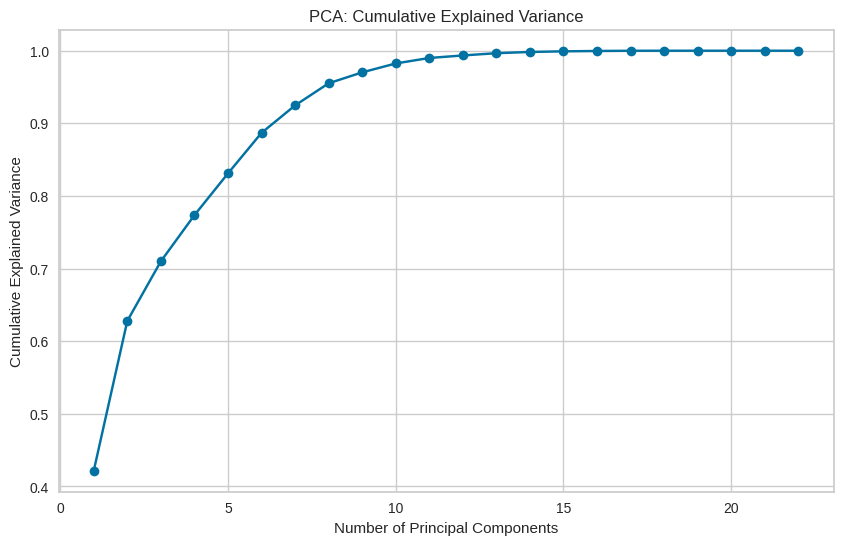

In [ ]:
def pca_plot(cumulative_explained_variance_score, scaler_df):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_explained_variance_score) + 1),
             cumulative_explained_variance_score, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA: Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

pca = PCA(n_components=df_cluster4.shape[1])
pca.fit(df_cluster4)

explained_variance_score = pca.explained_variance_ratio_
cumulative_explained_variance_score = np.cumsum(explained_variance_score)

pca_plot(cumulative_explained_variance_score, df_cluster4)

Now we select the number of principal components according to an expected variance, let's say 0.90. In class we saw that the best was .80, but we adjusted it a little to calibrate the model.

In [ ]:
df_cluster4.head(2)

,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET
item,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.10670,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161
ACCESORIES_1_002,-0.433299,-0.229603,-0.145644,-0.48238,-0.372640,-0.457813,-0.303781,-0.196988,-0.127782,-0.179513,-0.063230,-0.515790,-0.458520,-0.229182,-0.303296,0.032993,-0.078761,-0.132114,-0.447804,2.096774,-0.723172,-0.944161


In [ ]:
d_explainer = PCA(n_components=0.90) # esto lo podemos ajustar,
#num_comp = 5
num_comp = np.argmax(cumulative_explained_variance_score >= 0.90) + 1
print(f"Numero de Componentes Principales: {num_comp}")

# hacemos un FIT de PCA con los componentes seleccionados
pca = PCA(n_components=num_comp)
PCA_DS = pd.DataFrame(pca.fit_transform(df_cluster4), columns=[f'PC{i+1}' for i in range(num_comp)])

PCA_DS.describe().T

Numero de Componentes Principales: 7


,count,mean,std,min,25%,50%,75%,max
PC1,3049.0,3.728660e-17,3.046263,-2.186099,-1.355894,-0.815091,0.240258,57.777376
PC2,3049.0,-7.457320e-17,2.130737,-12.575673,-1.302104,-0.390159,0.869064,24.590222
PC3,3049.0,3.728660e-17,1.343805,-17.383966,-0.579830,-0.000436,0.773792,33.558654
PC4,3049.0,-7.457320e-17,1.182243,-5.622175,-0.737415,-0.411861,1.284909,10.028634
PC5,3049.0,-3.728660e-17,1.124930,-12.069683,-0.749064,-0.130554,0.321027,12.553094
PC6,3049.0,1.864330e-17,1.108451,-19.962591,-0.331327,-0.073996,0.309923,21.265033
PC7,3049.0,-3.262577e-17,0.912150,-10.906049,-0.202118,-0.024339,0.164794,26.153478


In [ ]:
PCA_DS.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.021997,2.575307,-0.454566,-1.725623,1.410613,0.134254,0.427949
1,-1.423951,0.182279,-0.023775,-1.073892,1.790160,0.726838,0.150122
2,-1.862471,-0.110773,0.017563,-1.029450,1.728745,0.539535,0.603181
3,1.628756,0.716804,0.226131,-0.936358,2.024742,0.823912,-0.070028
4,-0.928383,-0.324784,0.026932,-0.936222,1.966579,0.834214,0.106933
5,-1.572960,-1.330640,0.028324,-0.768724,2.070201,1.053958,0.195214
6,-1.466889,1.979486,-0.500133,-1.642703,1.470416,0.376385,0.267259
7,1.539886,-2.870934,-1.074085,-0.832500,3.130988,-0.061878,1.067212
8,-1.383709,-0.970290,-0.007868,-0.845537,2.012309,1.000176,0.154904
9,-1.389372,-0.275856,-0.086921,-1.014932,1.872543,0.908789,0.028074


#ELBOW METHOD

We have set the maximum number of clusters to explore to be 10, this method as we saw in class helps us understand the optimal number to identify the clusters

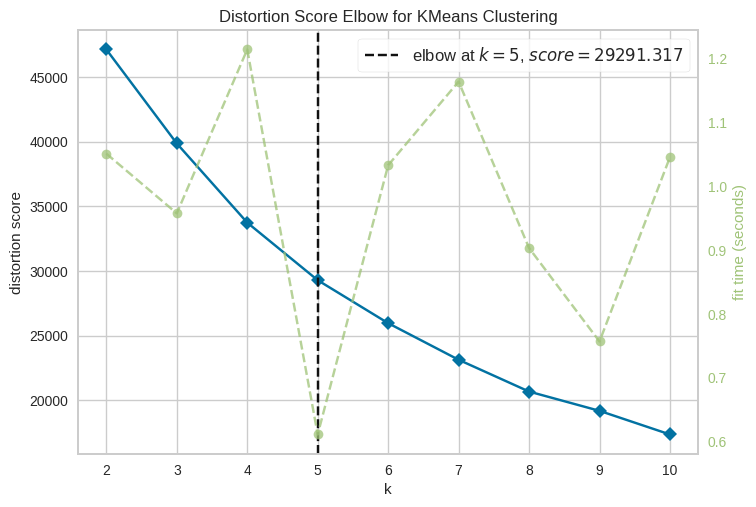

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_DS)
Elbow.show()

In this case there are 5 optimal clusters for our dataset

# KMEANS

Since we have the PCA results and we see how many CLUSTERS the model tells us, it is time to create them; Elbow Method recommends using 5 Clusters, however, when evaluating the dimensionality and the products grouped into 5 Clusters, it results in 1 Cluster with very few products, which in a business sense we decided not to use 5 but 4.

In [ ]:
# Primero especifijamos los parametros y los clusters
no_clusters = 4
max_iter = 1000
algorithm = 'elkan'

# aplicamos KMEANS
kmeans5 = MiniBatchKMeans(n_clusters=no_clusters, max_iter=max_iter, random_state=random_state)

# hacemos el FIT a nuestro dataset
KM = kmeans5.fit_predict(PCA_DS)

# asignamos los lables de los clusters al dataframe
PCA_DS_KM = PCA_DS
df_cluster5 = df_cluster4.copy()
PCA_DS_KM['cluster'] = KM
df_cluster5['cluster'] = KM

We create a function to obtain the correlation

In [ ]:
def correlation_analysis(data):

    # Check if the 'cluster' column exists before conversion
    if 'cluster' in data.columns and data['cluster'].dtype == object:
        data['cluster'] = data['cluster'].astype('category').cat.codes

    corr = data.corr()
    threshold = 0.10  # Ajustamos como deseamos

    # Check if 'cluster' column exists in correlation matrix
    if 'cluster' in corr.columns:
        high_corr_features = corr['cluster'][(corr['cluster'] > threshold) | (corr['cluster'] < -threshold)]
        print("Features with high correlation to 'clusters':")
        print(high_corr_features)
    else:
        print("No 'cluster' column found in the correlation matrix.")

We make a Feature Importance using correlation analysis

In [ ]:
correlation_analysis(df_cluster5)

Features with high correlation to 'clusters':
totalSales               -0.102755
avgSellPrice             -0.102951
totalQtySold             -0.144269
avgQtySold               -0.172715
maxQtySold               -0.165622
MaxPrice                  0.104859
MinPrice                  0.133513
avgPrice                  0.124770
medianSales              -0.112192
medianQtySold            -0.171405
rangeQtySold             -0.165687
residual_variation       -0.114701
category_ACCESORIES       0.332753
category_HOME_&_GARDEN    0.617351
category_SUPERMARKET     -0.846262
cluster                   1.000000
Name: cluster, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go # Import the plotly.graph_objects module
import plotly.io as pio
pio.renderers

def correlation_plot(data):
    corr = data.corr()

    fig = go.Figure(data=go.Heatmap(
        z=corr,
        x=corr.index,
        y=corr.columns,
        colorscale='Greens',
        zmin=-1,
        zmax=1,
        colorbar=dict(title='Correlation')
    ))

    fig.update_layout(
        title='Correlation Heatmap',
        xaxis_title='Features',
        yaxis_title='Features',
        width=600,
        height=600
    )

    fig.show()

In [ ]:
# esto es esencial para todos los graficos
%matplotlib inline
pio.renderers.default = 'colab'

Correlation Heatmap

In [ ]:
correlation_plot(df_cluster5)
#

#PCA PLOT

Since we have created the clusters, it is time to make a visualization to see how they are correlated with each other.

In [ ]:
def pca_plot(cumulative_explained_variance, df):
    fig = px.line(x=np.arange(1, df.shape[1] + 1), y=cumulative_explained_variance, markers=True)

    # Customize the figure
    fig.update_layout(
        title='Explained Variance by Number of Principal Components',
        xaxis_title='Number of Principal Components',
        yaxis_title='Cumulative Explained Variance',
        showlegend=False,
        width=800,
        height=500,
    )

    # Show the Plotly figure
    fig.show()

In [ ]:
import plotly.express as px

def plot_3d(df, columns, title):

    fig = px.scatter_3d(df, x=columns[0], y=columns[1], z=columns[2], color=columns[3],
                       title=title, width=800, height=700)
    fig.show()

# Now you can call the function
plot_3d(PCA_DS_KM, ['PC1', 'PC2', 'PC3', 'cluster'], 'PCA Plot')

# use this to rotate and see the clusters

Bar Clusters Distribution

In [ ]:
def bar_graph(data):

    custom_colors = px.colors.qualitative.Plotly

    count_df = data["cluster"].value_counts().reset_index()
    count_df.columns = ["cluster", "Count"]

    bar_clusters = []
    for i, row in count_df.iterrows():
        cluster_label = row["cluster"]
        count = row["Count"]
        color = custom_colors[cluster_label % len(custom_colors)] # Use modulo operator to cycle through colors if necessary
        bar_trace = go.Bar(x=[cluster_label], y=[count], marker_color=color)
        bar_clusters.append(bar_trace)

    # Create the layout for the bar chart
    layout = go.Layout(
        title="Distribution Of The Clusters",
        xaxis=dict(title="cluster"),
        yaxis=dict(title="Count"),
        width=600,
        height=500
    )

    fig = go.Figure(data=bar_clusters, layout=layout)
    fig.show()

In [ ]:
bar_graph(df_cluster5)

Scattler Plot de los clusters

In [ ]:
!pip install plotly

import plotly.express as px
import plotly.graph_objects as go

def scatter_plot(data, xyc):
    cluster_colors = px.colors.qualitative.Alphabet
    color_dict = {cluster: color for cluster, color in enumerate(cluster_colors)}

    # Ensure the cluster column is used for creating 'Cluster Names'
    data['Cluster Names'] = data[xyc[2]].apply(lambda x: x)

    # Verify that xyc[0] and xyc[1] correspond to valid column names in your DataFrame
    print(data.columns) # Print columns to check if 'PC1' and 'PC2' exist

    fig = px.scatter(data, x=xyc[0], y=xyc[1], color="Cluster Names",
                     title="Clusters DS Market")

    fig.update_layout(
        width=800,
        height=500,
        legend_title_text="Cluster Number"
    )

    fig.show()

Here is how to visualize our clusters associated with the VIA dataset (ITEMS & TOTAL SALES)

Seasonality Plot

In [ ]:
scatter_plot(data=df_cluster5, xyc=['seasonality','totalSales', 'cluster'])

Index(['totalSales', 'MaxSales', 'MinSales', 'avgSellPrice', 'totalQtySold',
       'avgQtySold', 'maxQtySold', 'minQtySold', 'MaxPrice', 'MinPrice',
       'avgPrice', 'medianSales', 'medianQtySold', 'rangeSales',
       'rangeQtySold', 'priceRange', 'seasonality', 'seasonal_amplitude',
       'residual_variation', 'category_ACCESORIES', 'category_HOME_&_GARDEN',
       'category_SUPERMARKET', 'cluster', 'Cluster Names'],
      dtype='object')


Here is how to visualize our clusters associated with TOTAL SALES)

1.   List item
2.   List item



In [ ]:
import plotly.express as px
fig = px.box(df_cluster5, x='cluster', y='totalSales', color='cluster', title='Distribution of Total Sales by Cluster')
fig.show()


In [ ]:
fig = px.violin(df_cluster5, x='cluster', y='totalSales', color='cluster', title='Distribution of Total Sales by Cluster')
fig.show()

# Silhouette Score

We use this method to analyze how well each data point fits its assigned cluster compared to neighboring clusters. It provides a silhouette score for each data point, ranging from -1 to 1, and represents the quality of the clustering solution. A higher silhouette score indicates that a data point matches its cluster well, while a lower score suggests that it might belong to a different cluster.

This method allows us to observe how many clusters are the best to consider.

Best K value: 2
Best Silhouette Score: 0.677805535529131


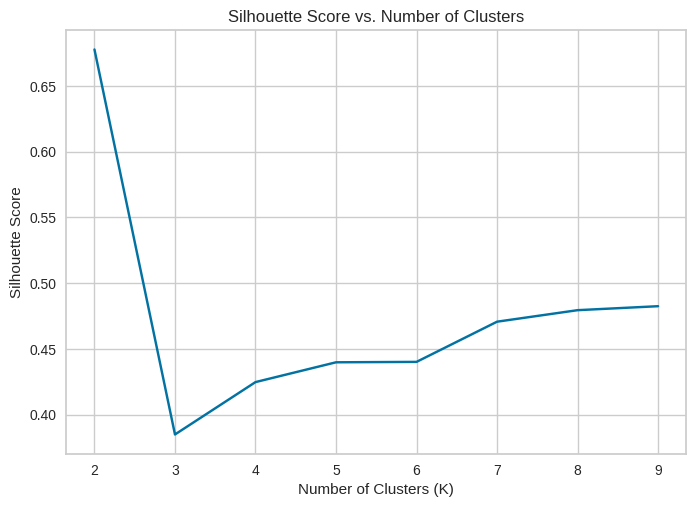

In [ ]:
from sklearn.metrics import silhouette_score
k_values = range(2, 10)
silhouette_scores = []

best_k = None
best_silhouette_score = -1

for k in k_values:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=50, random_state=42)
    km.fit(PCA_DS)
    sample_size = 3000
    sample_indices = np.random.choice(PCA_DS.shape[0], sample_size, replace=False)
    #silhouette_avg = silhouette_score(PCA_DS.iloc[sample_indices], km.labels_[sample_indices])
    silhouette_avg = silhouette_score(PCA_DS, km.labels_, n_jobs=-1)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

print("Best K value:", best_k)
print("Best Silhouette Score:", best_silhouette_score)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# KMEANS after using SILHOUETTE SCORE to test if this methodology helps us understand whether to adjust and reduce the number of clusters

Now we have learned the new result based on the number of clusters that the model has recommended to us, which are only 2

In [ ]:
n_clusters = 2
max_iter = 1000
algorithm = 'elkan'

# creamos KMEANS para este nuevo scope
kmeans2 = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)

# hacemos el fit de Kmeans al modelo de nuestro dataset nuevo con el silhouette score
KM2 = kmeans2.fit_predict(PCA_DS)

# asignamos los clusters labels al dataframe que hemos creado
PCA_DS_KM2 = PCA_DS
df_cluster6 = df_cluster5.copy()
PCA_DS_KM2['cluster'] = KM2
df_cluster6['cluster'] = KM2

We do another FEATURE IMPORTANCE using the CORRELATION ANALYSIS function

In [ ]:
correlation_analysis(df_cluster6)

Features with high correlation to 'clusters':
totalSales                0.187954
MaxSales                  0.180146
MinSales                 -0.180065
avgSellPrice              0.179224
totalQtySold              0.292359
avgQtySold                0.329378
maxQtySold                0.314964
minQtySold                0.124366
MaxPrice                 -0.375705
MinPrice                 -0.404653
avgPrice                 -0.400108
medianSales               0.183449
medianQtySold             0.323753
rangeSales                0.181438
rangeQtySold              0.314812
priceRange               -0.132987
seasonal_amplitude        0.163149
residual_variation        0.190249
category_ACCESORIES      -0.421899
category_HOME_&_GARDEN   -0.621417
category_SUPERMARKET      0.919519
cluster                   1.000000
Cluster Names            -0.893148
Name: cluster, dtype: float64


In [ ]:
correlation_plot(df_cluster6)

In [ ]:
plot_3d(PCA_DS_KM2, ['PC1', 'PC2', 'PC3', 'cluster'], 'PCA Plot')

In [ ]:
bar_graph(df_cluster6)

In [ ]:
scatter_plot(df_cluster6, ['seasonality', 'totalSales', 'cluster'])


Index(['totalSales', 'MaxSales', 'MinSales', 'avgSellPrice', 'totalQtySold',
       'avgQtySold', 'maxQtySold', 'minQtySold', 'MaxPrice', 'MinPrice',
       'avgPrice', 'medianSales', 'medianQtySold', 'rangeSales',
       'rangeQtySold', 'priceRange', 'seasonality', 'seasonal_amplitude',
       'residual_variation', 'category_ACCESORIES', 'category_HOME_&_GARDEN',
       'category_SUPERMARKET', 'cluster', 'Cluster Names'],
      dtype='object')


Here is how to visualize our clusters associated with the TOTAL SALES) with the 2 CLUSTERS suggested by the silhouette score

In [ ]:
import plotly.express as px
fig = px.box(df_cluster6, x='cluster', y='totalSales', color='cluster', title='Distribution of Total Sales by Cluster')
fig.show()

In [ ]:
fig = px.violin(df_cluster6, x='cluster', y='totalSales', color='cluster', title='Distribution of Total Sales by Cluster')
fig.show()

# Metodos de Final Evaluación

**SUM OF SQUARED ERRORS**

First we add up the **SQUARED ERRORS,** with this we add up all the squared distances between each data point and its assigned centroid, a **LOWER** value of this sum indicates that the data points within each **CLUSTER** are closer to their respective centroids **WHICH TELLS US THAT IT IS THE BEST SOLUTION**

In [ ]:
SSE_k4 = kmeans5.inertia_
SSE_k2 = kmeans2.inertia_
print(f"Cuando hay 4 Clusters K=4 SSE = {SSE_k4}\nCuando hay 2 Clusters K=2 SSE = {SSE_k2}")

Cuando hay 4 Clusters K=4 SSE = 35016.270309643485
Cuando hay 2 Clusters K=2 SSE = 55194.86130154998


WINNER WITH THIS METHOD IS ** USING 4 CLUSTERS **

**Silhouette Score**

---



Silhouette Score measures the quality of clustering solutions by assessing the cohesion within clusters and the separation between them. It calculates a silhouette coefficient for each data point, ranging from **-1 to 1**. **A higher silhouette score indicates that the data point matches well with its assigned cluster, suggesting a good clustering structure.**

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

sample_size = 1000  # Adjust as needed
sample_indices = np.random.choice(PCA_DS.shape[0], sample_size, replace=False)

silhouette_score_K4 = silhouette_score(PCA_DS.iloc[sample_indices], KM[sample_indices])
silhouette_score_K2 = silhouette_score(PCA_DS.iloc[sample_indices], KM2[sample_indices])

print(f"Cuando hay 4 Clusters K=4 usando silhouette_score = {silhouette_score_K4}\nCuando hay 2 Clusters K=2 usando silhouette_score  = {silhouette_score_K2}")

Cuando hay 4 Clusters K=4 usando silhouette_score = 0.31451174016312927
Cuando hay 2 Clusters K=2 usando silhouette_score  = 0.28403048895265004


GANADOR CON ESTE METODO ES ** USANDO 4 CLUSTERS**

# Conclusion

To help us better understand what we just did it is good to analyze and check the distances of the points one last time.

**Silhouette PLOT Analysis** can be used to study the separation distance between the resulting clusters. The silhouette plot shows a measure of the proximity of each point in a cluster to points in neighboring clusters and thus provides a way to visually assess parameters such as various clusters.

Let's check this to choose our k; the following conditions are required:

**1. For a particular K, all clusters must have a Silhouette score greater than the average score of the data set represented by the red dotted line. The x-axis represents the Silhouette score.**

2. There should not be large fluctuations in the size of the clusters. The width of the clusters represents the number of data points. **bold text**

We analyze 5 Clusters with SilhouetteVisualizer, it is intended that all clusters are or touch at least the average of the coefficients

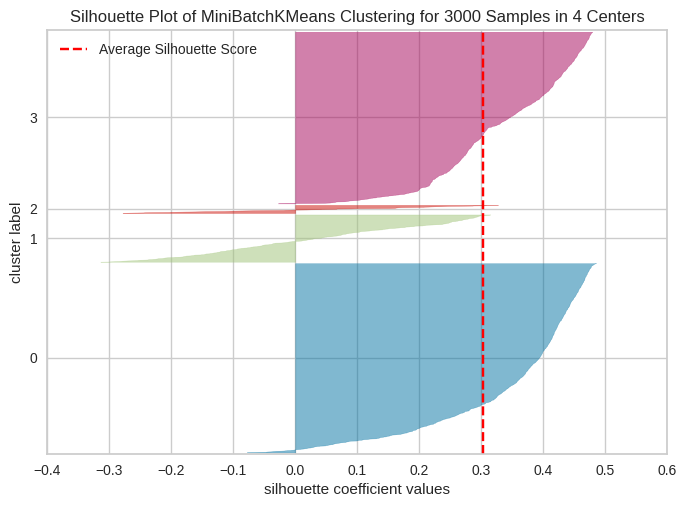

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 3000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

sample_size = 3000
sample_indices = np.random.choice(PCA_DS_KM.shape[0], sample_size, replace=False)
sampled_data = PCA_DS_KM.iloc[sample_indices]

visualizer = SilhouetteVisualizer(kmeans5, colors='yellowbrick')
visualizer.fit(sampled_data.drop('cluster', axis=1))
visualizer.show()

For the 4 Clusters we have chosen here we observe the centroids within each cluster and we observe a good distribution between them.

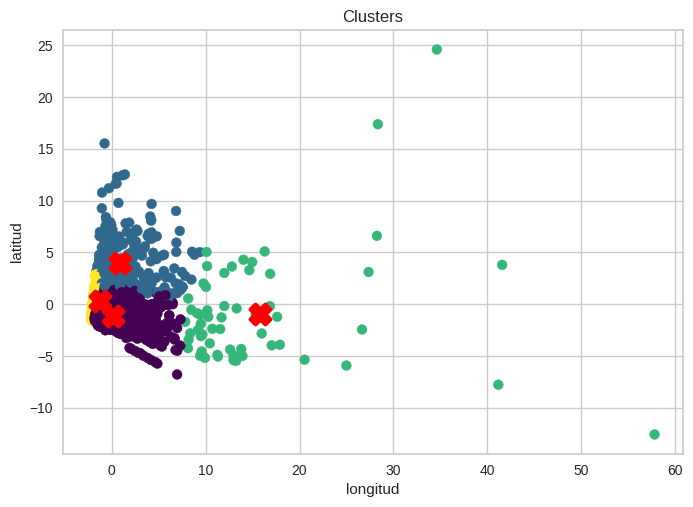

In [ ]:
labels = kmeans5.labels_
centroids = kmeans5.cluster_centers_
plt.scatter(PCA_DS_KM.iloc[:, 0], PCA_DS_KM.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.title('Clusters')
plt.show()

# DATASETS OUTPUTS EXCEL FOR TABLEAU VISUALIZATION ON BUILDING A REPORT

In [ ]:
df_cluster5 = df_cluster5.rename(columns={'cluster': 'CLUSTER'})
df_cluster5.head(2)

,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,CLUSTER,Cluster Names
item,,,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.10670,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161,1,1
ACCESORIES_1_002,-0.433299,-0.229603,-0.145644,-0.48238,-0.372640,-0.457813,-0.303781,-0.196988,-0.127782,-0.179513,-0.063230,-0.515790,-0.458520,-0.229182,-0.303296,0.032993,-0.078761,-0.132114,-0.447804,2.096774,-0.723172,-0.944161,3,3


In [ ]:
combined_df_5 = pd.concat([PCA_DS_KM.reset_index(drop=False), df_cluster5.reset_index(drop=False)], axis=1)
combined_df_5.head(2)

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster,item,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,CLUSTER,Cluster Names
0,0,-1.021997,2.575307,-0.454566,-1.725623,1.410613,0.134254,0.427949,0,ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.10670,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161,1,1
1,1,-1.423951,0.182279,-0.023775,-1.073892,1.790160,0.726838,0.150122,0,ACCESORIES_1_002,-0.433299,-0.229603,-0.145644,-0.48238,-0.372640,-0.457813,-0.303781,-0.196988,-0.127782,-0.179513,-0.063230,-0.515790,-0.458520,-0.229182,-0.303296,0.032993,-0.078761,-0.132114,-0.447804,2.096774,-0.723172,-0.944161,3,3


In [ ]:
combinedAll_5 = combined_df_5.reset_index().merge(df_cluster2.reset_index(), on='item', how='inner')
combinedAll_5.head(2)

,level_0,index_x,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster,item,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,CLUSTER,Cluster Names,index_y,date,id_s,region,store_code,store,department,category,total_qty_sold,sell_price,sales
0,0,0,-1.021997,2.575307,-0.454566,-1.725623,1.410613,0.134254,0.427949,0,ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.1067,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161,1,1,494680,2013-07-01,ACCESORIES_1_001_BOS_1,Boston,BOS_1,South_End,ACCESORIES_1,ACCESORIES,10,11.5710,115.7100
1,0,0,-1.021997,2.575307,-0.454566,-1.725623,1.410613,0.134254,0.427949,0,ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.1067,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161,1,1,494681,2013-07-01,ACCESORIES_1_001_BOS_2,Boston,BOS_2,Roxbury,ACCESORIES_1,ACCESORIES,3,12.7414,38.2242


In [ ]:
combinedAll_5.shape

(1362319, 46)

In [ ]:
combinedAll_5.drop(columns=['cluster'], inplace=True)

In [ ]:
df_aggCombined = combinedAll_5.explode('CLUSTER').groupby(['item','category','store_code','CLUSTER']).agg(
    total_sale2=('sales', 'sum'),
    mean_price2=('sell_price', 'mean')
).reset_index().set_index('item')


In [ ]:
df_aggCombined.head(2)

,category,store_code,CLUSTER,total_sale2,mean_price2
item,,,,,
ACCESORIES_1_001,ACCESORIES,BOS_1,1,2854.57235,10.971131
ACCESORIES_1_001,ACCESORIES,BOS_2,1,4421.55840,11.037435


In [ ]:
df_aggCombined.shape

(30490, 5)

In [ ]:
combined_df_6 = pd.concat([combined_df_5.reset_index(drop=False), df_aggCombined.reset_index(drop=False)], axis=1)

In [ ]:
combined_df_6.head(2)

,level_0,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster,item,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,CLUSTER,Cluster Names,item,category,store_code,CLUSTER,total_sale2,mean_price2
0,0.0,0.0,-1.021997,2.575307,-0.454566,-1.725623,1.410613,0.134254,0.427949,0.0,ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.10670,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161,1.0,1.0,ACCESORIES_1_001,ACCESORIES,BOS_1,1,2854.57235,10.971131
1,1.0,1.0,-1.423951,0.182279,-0.023775,-1.073892,1.790160,0.726838,0.150122,0.0,ACCESORIES_1_002,-0.433299,-0.229603,-0.145644,-0.48238,-0.372640,-0.457813,-0.303781,-0.196988,-0.127782,-0.179513,-0.063230,-0.515790,-0.458520,-0.229182,-0.303296,0.032993,-0.078761,-0.132114,-0.447804,2.096774,-0.723172,-0.944161,3.0,3.0,ACCESORIES_1_001,ACCESORIES,BOS_2,1,4421.55840,11.037435


In [ ]:
combined_df_6.shape

(30490, 41)

In [ ]:
combined_df_2 = pd.concat([PCA_DS_KM2.reset_index(drop=False), df_cluster6.reset_index(drop=False)], axis=1)
combined_df_2.head(2)

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster,item,totalSales,MaxSales,MinSales,avgSellPrice,totalQtySold,avgQtySold,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,seasonality,seasonal_amplitude,residual_variation,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET,cluster,Cluster Names
0,0,-1.021997,2.575307,-0.454566,-1.725623,1.410613,0.134254,0.427949,0,ACCESORIES_1_001,-0.271333,-0.232918,0.693372,-0.10670,-0.394473,-0.408427,-0.415403,-0.196988,1.349063,1.307592,1.205664,-0.052512,-0.397044,-0.237127,-0.415056,0.749098,0.151095,-0.158425,-0.431176,2.096774,-0.723172,-0.944161,0,0
1,1,-1.423951,0.182279,-0.023775,-1.073892,1.790160,0.726838,0.150122,0,ACCESORIES_1_002,-0.433299,-0.229603,-0.145644,-0.48238,-0.372640,-0.457813,-0.303781,-0.196988,-0.127782,-0.179513,-0.063230,-0.515790,-0.458520,-0.229182,-0.303296,0.032993,-0.078761,-0.132114,-0.447804,2.096774,-0.723172,-0.944161,0,0


In [ ]:
clusters_agg = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TFM_DS_Store/ITEMS_CLUSTERS.xlsx')
clusters_agg.head(2)

,item,CLUSTER,Cluster_Names,cluster_description
0,ACCESORIES_1_001,1,Accesorios Estables,Productos Estrella ACCESORIOS / Demanda Media...
1,ACCESORIES_1_002,3,Mejoras del Hogar,Productos Estrella HOME & GARDEN / Demanda Inc...


In [ ]:
Final_dataset_clusters = df_cluster.merge(clusters_agg, on='item', how='inner')
Final_dataset_clusters.head(2)

,date,id_s,region,store_code,store,department,category,item,total_qty_sold,sell_price,sales,CLUSTER,Cluster_Names,cluster_description
0,2011-01-01,ACCESORIES_1_004_BOS_1,Boston,BOS_1,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,4,5.7722,23.0888,3,Mejoras del Hogar,Productos Estrella HOME & GARDEN / Demanda Inc...
1,2011-01-01,ACCESORIES_1_004_BOS_2,Boston,BOS_2,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,10,5.7722,57.7220,3,Mejoras del Hogar,Productos Estrella HOME & GARDEN / Demanda Inc...


In [ ]:
export = Final_dataset_clusters.to_csv('Final_dataset_clusters.csv', index=False)